# Program2 bonus3 report
bonus1 and bonus2 can be found from PLSI.py

In [1]:
from PLSI import PLSI
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')

In [2]:
params = {
    'name' : "model_base",
    'dirName' : "corpus",
    'ext' : "txt",
    'toload' : False, 
    'stopWordList' : ['a','the'], 
    'ignoreCase' : True, 
    'stem' : "snowball", 
    'topicCount' : 6, 
    'iterations' : 8,
    'randomInit' : '',
    'bonus2' : False
}

In [3]:
def plot_comparison(params):
    # base case model
    model_base = PLSI(**params)

    # bonus 1 with random model
    params['name'] = "model_random"
    params['randomInit'] = 'random'
    model_random = PLSI(**params)

    # bonus 1 with dirchlet model
    params['name'] = "model_dirchlet"
    params['randomInit'] = 'dirchlet'
    model_dirchlet = PLSI(**params)

    # bonus 2 with base case model
    params['name'] = "model_base2"
    params['bonus2'] = True
    params['randomInit'] = ''
    model_base2 = PLSI(**params)

    # bonus 2 with random model
    params['name'] = "model_random2"
    params['randomInit'] = 'random'
    params['bonus2'] = True
    model_random2 = PLSI(**params)

    # bonus 2 with dirchlet model
    params['name'] = "model_dirchlet2"
    params['randomInit'] = 'dirchlet'
    params['bonus2'] = True
    model_dirchlet2 = PLSI(**params)
    
    # print the documents I use
    print(model_dirchlet2.documentNameList)
    

    performance = {}

    # base case performance
    performance['base'] = -model_base.document_probability(
        model_base.dt,
        model_base.tw,
        model_base.document_words,
        model_base.documentNum,
        model_base.corpus
    )

    # bonus1 with random model's performance
    performance['b1_random'] = -model_random.document_probability(
        model_random.dt,
        model_random.tw,
        model_random.document_words,
        model_random.documentNum,
        model_random.corpus
    )

    # bonus1 with dirchlet model's performance
    performance['b1_dirchlet'] = -model_dirchlet.document_probability(
        model_dirchlet.dt,
        model_dirchlet.tw,
        model_dirchlet.document_words,
        model_dirchlet.documentNum,
        model_dirchlet.corpus
    )

    # bonus2 with base model's performance
    performance['b2_base'] = -model_base2.document_probability(
            model_base2.dt,
            model_base2.tw,
            model_base2.document_words,
            model_base2.documentNum,
            model_base2.corpus
    )

    # bonus2 with random model's performance
    performance['b2_random'] = -model_random2.document_probability(
            model_random2.dt,
            model_random2.tw,
            model_random2.document_words,
            model_random2.documentNum,
            model_random2.corpus)

    # bonus2 with dirchlet model's performance
    performance['b2_dirchlet'] = -model_dirchlet2.document_probability(
            model_dirchlet2.dt,
            model_dirchlet2.tw,
            model_dirchlet2.document_words,
            model_dirchlet2.documentNum,
            model_dirchlet2.corpus)
    
    # plot the comparison graph
    x = list(performance.keys())
    y = list(performance.values())

    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color=['black', 'red', 'green', 'blue', 'orange', 'yellow'])
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)
    plt.title("models' average log sum of probabilities(smaller value is better)")
    for i, v in enumerate(y):
        ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

### From the graph below, the observation is that bonus1 with dirchlet option model is the best model with small iterations since it has the smallest value. The performance score is the minus of average each sum of the log document probabilities. So a smaller value here means a higher probability. It seems that model with initialized dirichlet distribution perform best, and then the random distribution one.

In [4]:
# this code can also be found in PLSI.py
'''
calculate the averge sum of log probability in all documents
'''
def document_probability(self,dt,tw,document_words,documentNum,corpus):
    prosSum = [0] * documentNum
    for documentIndex in range(documentNum):
        for ch in document_words[documentIndex]:
            wordIndex = corpus.index(ch)
            prosSum[documentIndex] += np.log10(np.dot(tw[:,wordIndex],dt[documentIndex]))
    return np.round(np.mean(prosSum),4)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.67 µs
['Deepfakes Generation and Detection.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']


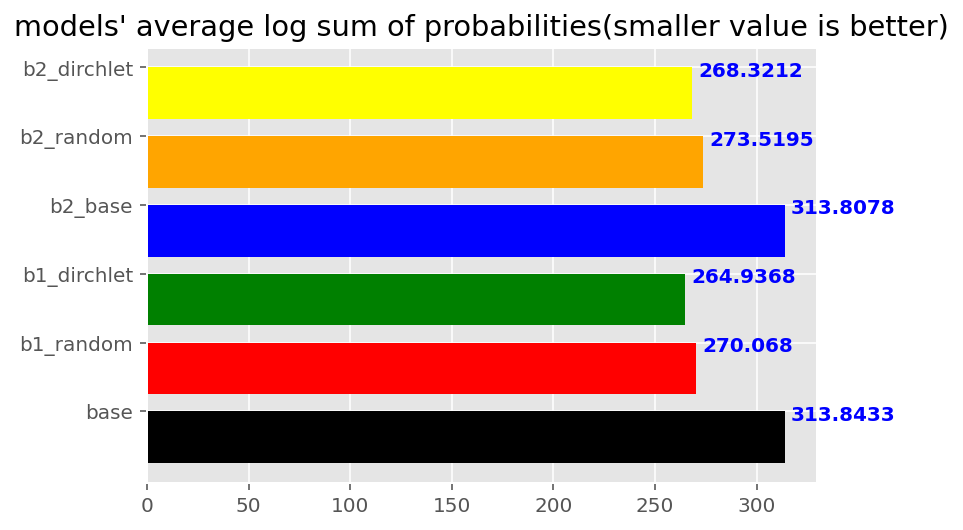

In [5]:
%time
params['iterations'] = 15
plot_comparison(params)

### when iterations increase, the situation may change a little bit. From this graph above, we may see that model with bonus 2 with dirchlet option performs better.

['Deepfakes Generation and Detection.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 7.13 s, sys: 76.2 ms, total: 7.21 s
Wall time: 6.98 s


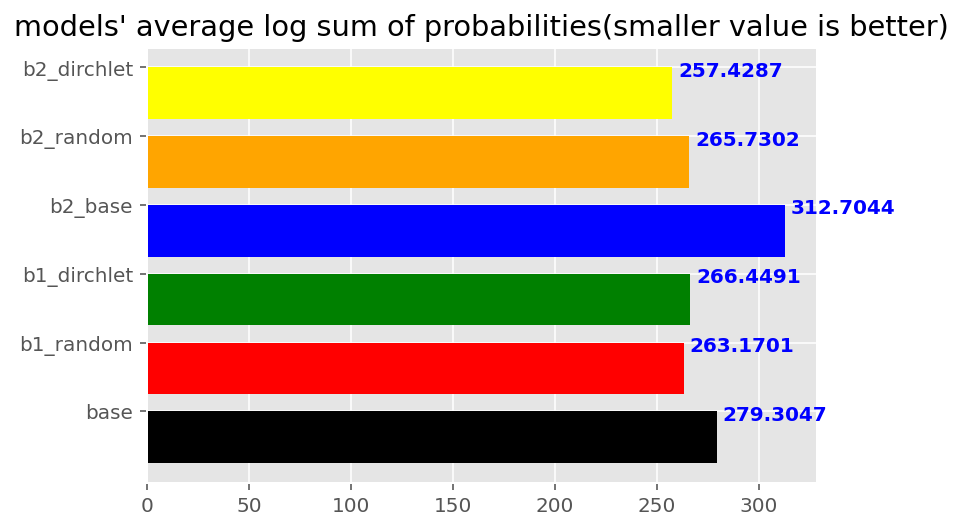

In [6]:
%%time
params['iterations'] = 30
plot_comparison(params)

### if using 500 iterations to test, the base case result seems to be better

['Deepfakes Generation and Detection.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 2min, sys: 469 ms, total: 2min
Wall time: 2min


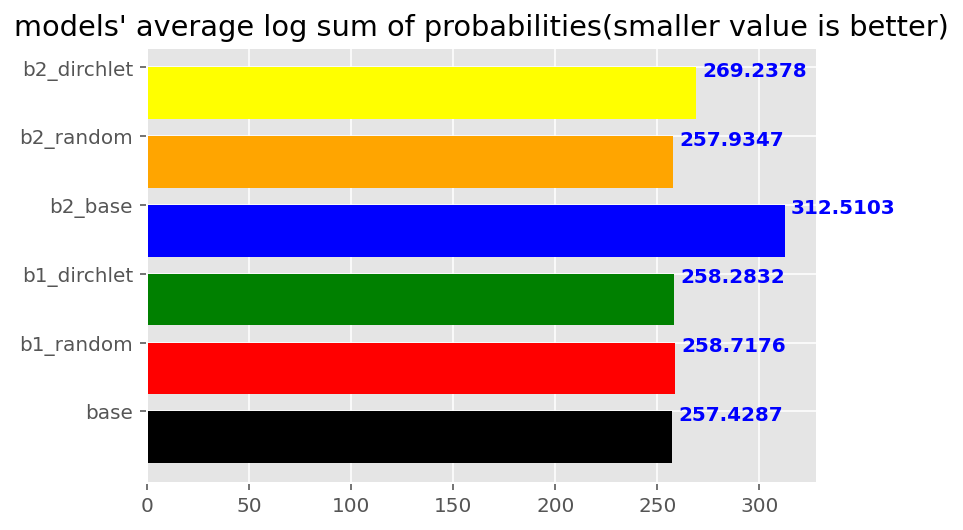

In [7]:
%%time
params['iterations'] = 500
plot_comparison(params)

### If I increase topicCount, then bonus1 and bonus2 with dirchlet option is close to each othe

['Deepfakes Generation and Detection.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 9.77 s, sys: 38.2 ms, total: 9.81 s
Wall time: 9.79 s


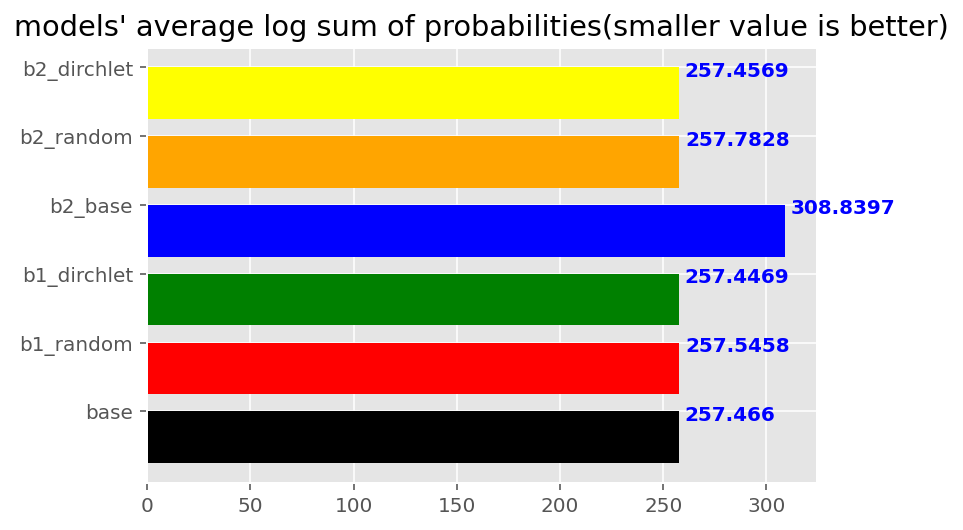

In [9]:
%%time
params['topicCount'] = 20
params['iterations'] = 15
plot_comparison(params)